In [0]:
#Connect to our own Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


https://pypi.org/project/sentence-transformers/

In [0]:
%cd "/content/gdrive/My Drive/ProjetNLPQuora/"
!ls

/content/gdrive/My Drive/ProjetNLPQuora
bert-master  test.csv  train.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from numpy import genfromtxt



df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

#embq1 = genfromtxt('embq1.csv', delimiter=',')
#embq2 = genfromtxt('embq2.csv', delimiter=',')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# CLEANING TO COMPUTE EMBEDDINGS NOT NECESSARY IF WE ALREADY COMPUTED THEM
df_train = df_train.dropna()
df_train = df_train.reset_index(drop=True)

df_train["question1"] = df_train["question1"].astype("str")
df_train["question2"] = df_train["question2"].astype('str')

q1 = df_train['question1'].tolist()
q2 = df_train['question2'].tolist()


In [0]:
# OPTIONNAL
df_test = df_test.dropna()
df_test = df_test.reset_index(drop=True)

df_test["question1"] = df_test["question1"].astype("str")
df_test["question2"] = df_test["question2"].astype('str')

q1test = df_test['question1'].tolist()
q2test = df_test['question2'].tolist()

In [0]:
! pip install sentence-transformers

     |████████████████████████████████| 61kB 2.0MB/s 
     |████████████████████████████████| 573kB 8.1MB/s 
     |████████████████████████████████| 1.0MB 64.0MB/s 
     |████████████████████████████████| 3.7MB 42.1MB/s 
     |████████████████████████████████| 890kB 63.8MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.2.6.1-cp36-none-any.whl size=74031 sha256=51dd340e6f1b022697a14355af42b3a5143dc138d2ab4ae9d5d0986bdf289b10
  Stored in directory: /root/.cache/pip/wheels/d7/fa/17/2b081a8cd8b0a86753fb0e9826b3cc19f0207062c0b2da7008
  Created wheel for sacremoses: filename=sacremoses-0.0.41-cp36-none-any.whl size=893334 sha256=93345426d4ea0b8e6e8f4f3cd79b2cdcac5015457be6dc34c49db50152f5d844
  Stored in directory: /root/.cache/pip/wheels/22/5a/d4/b020a81249de7dc63758a34222feaa668dbe8ebfe9170cc9b1
Successfully built sentence-transformers sacremoses


In [0]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

100%|██████████| 405M/405M [00:46<00:00, 8.74MB/s]


In [0]:
### VECTORIZING QUESTIONS DF_TRAIN ###
t1 = time.time()
print("Computing embeddings for q1 train")
embq1 = model.encode(q1)
t2 = time.time()-t1
print(t2,"seconds", t2/60, "minutes" )

t3 = time.time()
print("Computing embeddings for q2 train ")
embq2 = model.encode(q2)
t4 = time.time()-t3
print(t4,"seconds", t4/60, "minutes" )

print('Total time',time.time()-t1,"seconds", (time.time()-t1)/60, "minutes" )

Computing embeddings for q1 train
561.5707659721375 seconds 9.359512766202291 minutes
Computing embeddings for q2 train 
565.1609365940094 seconds 9.41934894323349 minutes
Total time 1126.7327666282654 seconds 18.77887945175171 minutes


In [0]:
# save numpy array as csv file # NOT A GOOD IDEA
from numpy import asarray
from numpy import savetxt
# define data
embq1csv = asarray(embq1)
embq2csv = asarray(embq2)
# save to csv file
savetxt('embq1.csv', embq1csv, delimiter=',')
savetxt('embq2.csv', embq2csv, delimiter=',')

In [0]:
### VECTORIZING QUESTIONS DF_TEST ### OPTIONAL
t1 = time.time()
print("Computing embeddings for q1 test ")
embq1test = model.encode(q1test[:100000])
t2 = time.time()-t1
print(t2,"seconds", t2/60, "minutes" )

t3 = time.time()
print("Computing embeddings for q2 test")
embq2test = model.encode(q2test[:100000])
t4 = time.time()-t3
print(t4,"seconds", t4/60, "minutes" )

print('Total time',time.time()-t1,"seconds", (time.time()-t1)/60, "minutes" )

Computing embeddings for q1 test 
138.44111609458923 seconds 2.3073519349098204 minutes
Computing embeddings for q2 test
138.17212510108948 seconds 2.3028687516848247 minutes
Total time 276.6143307685852 seconds 4.6102388540903725 minutes


In [0]:
df_train['emb1'] = embq1
df_train['emb2'] = embq2
#df_test['emb1'] = embq1test
#df_test['emb2'] = embq2test

datatrain = df_train[:300000] 
datatest = df_train[300000:]
datatest = datatest.reset_index(drop=True)


In [0]:
sim = []
for i in range(datatrain.shape[0]):
  if (i % 50000 == 0):
    print(100 * i/datatrain.shape[0], "% done")
  cosine = np.dot(embq1[i],embq2[i].transpose()) / (np.linalg.norm(embq1[i]) * np.linalg.norm(embq2[i]))
  #sim.append(1/(1 + math.exp(-100*(cosine - 0.85))))
  sim.append(cosine)

0.0 % done
16.666666666666668 % done
33.333333333333336 % done
50.0 % done
66.66666666666667 % done
83.33333333333333 % done


In [0]:
th = []
for i in range(200):
  t = .8 + 0.001*i
  dupl2 = (np.asarray(sim)>t)*1 
  th.append(sum(datatrain['is_duplicate']== dupl2)/datatrain.shape[0])

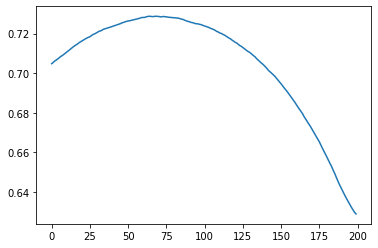

In [0]:
from matplotlib import pyplot as plt
plt.plot(th)

In [0]:
# Notes : avec embeddings pre trained 73 = pas mal 
# Tester les differents seuils peut s'apparenter a la phase de train. 
# Meilleure accuracy avec seuil de ~0.875 

In [0]:
# TESTING 
simtest = []
for i in range(datatest.shape[0]):
  if (i % 10000 == 0):
    print(100 * i/datatest.shape[0], "% done")
  cosine = np.dot(datatest['emb1'][i],datatest['emb2'][i].transpose()) / (np.linalg.norm(datatest['emb1'][i]) * np.linalg.norm(datatest['emb2'][i]))
  #sim.append(1/(1 + math.exp(-100*(cosine - 0.85))))
  simtest.append(cosine)

0.0 % done
9.588922876293307 % done
19.177845752586613 % done
28.76676862887992 % done
38.355691505173226 % done
47.94461438146653 % done
57.53353725775984 % done
67.12246013405314 % done
76.71138301034645 % done
86.30030588663975 % done
95.88922876293306 % done


In [0]:
dupltest = (np.asarray(simtest)>0.875)*1 
print(sum(datatest['is_duplicate']== dupltest)/datatest.shape[0])

0.7307718124023128


In [0]:

import torch
import torch.nn as nn
from torchtext.data import Field, LabelField, TabularDataset, Iterator, BucketIterator
from torchtext import vocab
import torch.optim as optim

In [0]:
class siameseNet(nn.Module):
  def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
    super().__init__()
    # self.embedding = nn.EmbeddingBag(vocab_size, embedding_dim, mode='mean')
    #self.embedding = nn.Embedding(vocab_size, embedding_dim)
    self.linear = nn.Linear(embedding_dim, hidden_dim)

  def forward_one(self, x):
    # output = self.embedding(x).mean(axis=0)
    # output = nn.AdaptiveAvgPool1d(1)(output)
    output = self.linear(x)
    return output

  def forward(self, input1, input2):
    #emb1 = self.embedding(input1).mean(axis=0)
    #emb2 = self.embedding(input2).mean(axis=0)
    output1 = self.linear(input1)
    output2 = self.linear(input2)
    # output = torch.norm(output1-output2)
    output = nn.CosineSimilarity()(output1, output2)
    return output

In [0]:

def train(model, vec1, vec2, optimizer, criterion, thresh, label, epoch):
    # Track the loss
    epoch_loss = 0
    epoch_TP_FN = 0
    epoch_FP_TN = 0
    
    model.train()
    
    for e in range(epoch):
        print("Epoch {}/{}".format(e,epoch))
        optimizer.zero_grad()
        
        predictions = model(vec1, vec2)
        loss = criterion(predictions, label.type(torch.float) )
        
        loss.backward()
        optimizer.step()

        predicted_labels = predictions >= thresh
        epoch_TP_FN += (predicted_labels==lab).sum().item()
        epoch_FP_TN += (predicted_labels!=lab).sum().item()
        
        epoch_loss += loss.item()
        print(epoch_TP_FN/(epoch_TP_FN+epoch_FP_TN))

        
    return epoch_loss / len(vec1), epoch_TP_FN/(epoch_TP_FN+epoch_FP_TN)


def evaluate(model, v1, v2, criterion, thresh, label):
    epoch_loss = 0
    epoch_TP_FN = 0
    epoch_FP_TN = 0
    
    model.eval()
    
    with torch.no_grad():
          predictions = model(v1, v2)
          loss = criterion(predictions, label.type(torch.float))

          predicted_labels = predictions >= thresh
          epoch_TP_FN += (predicted_labels==label).sum().item()
          epoch_FP_TN += (predicted_labels!=label).sum().item()

          epoch_loss += loss.item()
          print(epoch_TP_FN/(epoch_TP_FN+epoch_FP_TN))
      
    return epoch_loss / len(v1), epoch_TP_FN/(epoch_TP_FN+epoch_FP_TN)

In [0]:
model = siameseNet(1,768,500,1)
optimizer = optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()


In [0]:
v1 = torch.tensor(datatrain['emb1'])
v2 = torch.tensor(datatrain['emb2'])
lab = torch.tensor(datatrain['is_duplicate'])

In [0]:
v1test = torch.tensor(datatest['emb1'])
v2test = torch.tensor(datatest['emb2'])
labtest = torch.tensor(datatest['is_duplicate'])

In [33]:
train(model,v1,v2,optimizer,criterion, 0.8,lab,10)

Epoch 0/10
0.72265
Epoch 1/10
0.7226083333333333
Epoch 2/10
0.7225633333333333
Epoch 3/10
0.722545
Epoch 4/10
0.7225353333333333
Epoch 5/10
0.7225005555555556
Epoch 6/10
0.7224719047619048
Epoch 7/10
0.7224616666666667
Epoch 8/10
0.7224529629629629
Epoch 9/10
0.722469


(2.4509077668190003e-05, 0.722469)

In [34]:
evaluate(model, v1test, v2test, criterion, 0.75, labtest)


0.7252677706713205


(7.081089182368325e-06, 0.7252677706713205)

In [0]:
def linear_model_combined(optimizer='Adam'): 
    from keras.models import Model, Sequential
    from keras.layers.core import Dense, Flatten, Activation, Dropout
    from keras.layers import add

    modela = Sequential()
    modela.add(Flatten(input_shape=(1, 768)))
    modela.add(Dense(1024))
    modela.add(Activation('relu'))

    modelb = Sequential()
    modelb.add(Flatten(input_shape=(1, 768)))
    modelb.add(Dense(1024))
    modelb.add(Activation('relu'))


    merged_output = add([modela.output, modelb.output])   

    model_combined = Sequential()
    model_combined.add(Activation('relu'))
    model_combined.add(Dense(256))
    model_combined.add(Activation('relu'))
    model_combined.add(Dense(1))
    model_combined.add(Activation('softmax'))

    final_model = Model([modela.input, modelb.input], model_combined(merged_output))

    final_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return final_model

In [0]:
mod = linear_model_combined()

In [91]:
mod.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
flatten_3_input (InputLayer)    (None, 1, 768)       0                                            
__________________________________________________________________________________________________
flatten_4_input (InputLayer)    (None, 1, 768)       0                                            
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 768)          0           flatten_3_input[0][0]            
__________________________________________________________________________________________________
flatten_4 (Flatten)             (None, 768)          0           flatten_4_input[0][0]            
____________________________________________________________________________________________

In [0]:
from __future__ import absolute_import
from __future__ import print_function
import numpy as np

import random
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout, Lambda
from keras.optimizers import RMSprop
from keras import backend as K
epochs = 20



def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)


def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)




def create_base_network(input_shape):
    '''Base network to be shared (eq. to feature extraction).
    '''
    input = Input(input_shape)
    x = Flatten()(input)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(64, activation='relu')(x)
    return Model(input, x)


def compute_accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)


def accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))

input_shape = (1,768,)

# network definition
base_network = create_base_network(input_shape)

input_a = Input(input_shape)
input_b = Input(input_shape)

# because we re-use the same instance `base_network`,
# the weights of the network
# will be shared across the two branches
processed_a = base_network(input_a)
processed_b = base_network(input_b)

distance = Lambda(euclidean_distance,
                  output_shape=eucl_dist_output_shape)([processed_a, processed_b])

model = Model([input_a, input_b], distance)


In [153]:
v1 = np.asarray(v1)
v2 = np.asarray(v2)
lab = np.asarray(lab)
# train
rms = RMSprop()
model.compile(loss=contrastive_loss, optimizer=rms, metrics=[accuracy])

inp = np.stack((v1,v2))

model.fit((inp[0], inp[1]), lab,
          batch_size=128,
          epochs=epochs)#,
          #validation_data=([v1[1000:1100],v2[1000:1100]],lab[1000:1100]))

# compute final accuracy on training and test sets
y_pred = model.predict([tr_pairs[:, 0], tr_pairs[:, 1]])
tr_acc = compute_accuracy(tr_y, y_pred)
y_pred = model.predict([te_pairs[:, 0], te_pairs[:, 1]])
te_acc = compute_accuracy(te_y, y_pred)

print('* Accuracy on training set: %0.2f%%' % (100 * tr_acc))
print('* Accuracy on test set: %0.2f%%' % (100 * te_acc))

AttributeError: ignored

In [118]:
np.asarray(v1[:10]).shape

(10, 768)

In [0]:
conc = np.concatenate((np.asarray(v1[:10]),(np.asarray(v2[:10]))), axis = 1)

In [0]:
conc = conc.reshape(10,2,768)

In [137]:
conc[0].shape

(2, 768)

In [142]:
v1.shape

(300000, 768)

In [143]:
v2.shape


(300000, 768)